Trigger findig
----------------

In [7]:
# %load notebook_starter.py
import os
tmsDir = os.getenv('HOME')+'/work/repos/TMSPlane'

import sys
#sys.path.append('/data/repos/TMSPlane2/Software/X11/scripts')
sys.path.append(tmsDir+'/Software/Control/src')

from notebook_test import test, get_spectrum
from rootHelper import getRDF
import matplotlib.pyplot as plt
import numpy as np
from ROOT import gPad, gDirectory, gStyle, TCanvas, TGraph
gStyle.SetPalette(55)

dir1 = tmsDir+'/Software/Control/src/data/fpgaLin/'

plt.rc('figure', figsize=(15, 6))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import ROOT
ROOT.enableJSVis()

c = TCanvas()

In [8]:
d1a,ch1a = getRDF(dir1+'Mar08D1a/Mar08D1a_data_20.root')

Total entries: 1000
======> EVENT:0
 T               = 1552080591
 adc             = 0.813375, 
                  0.81375, 0.8135, 0.81325, 0.813125, 0.812875, 
                  0.813, 0.812688, 0.812688, 0.812563, 0.812875, 
                  0.81275, 0.813062, 0.8125, 0.81225, 0.812125, 
                  0.812, 0.81225, 0.812875, 0.812688


In [32]:
ch1a.Draw("adc[19]:Iteration$","Entry$==10","pl")
gPad.Draw()

In [16]:
%%cpp -d
void fx(float x) {
    cout << "This is function f " << x << endl;
}

In [17]:
print("This is again Python")
ROOT.fx(59)

This is again Python
This is function f 59


In [18]:
a = 1
print(f'a is {a}')

a is 1


In [23]:
def getX(ch, ich, entry, cut=''):
    n1 = ch.Draw(f'adc[{ich}]',f'Entry$=={entry}'+cut,'goff')
    va1 = ch.GetV1()
    return np.array([va1[i] for i in range(n1)])

In [24]:
x1 = getX(ch1a,19,3)

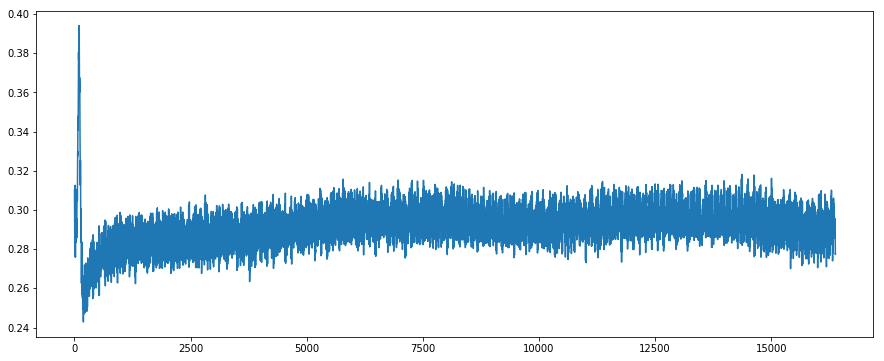

In [25]:
plt.plot(x1)

In [33]:
print(os.getcwd())

/data/repos/TMSPlane2/Software/Analysis/X19/notebooks


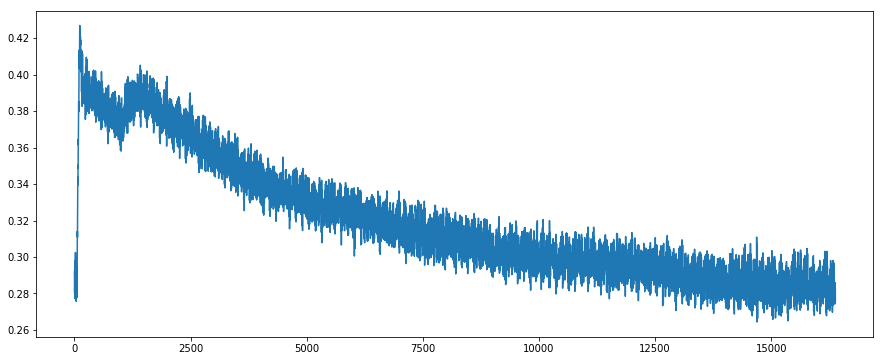

In [54]:
plt.plot(getX(ch1a,19,24))

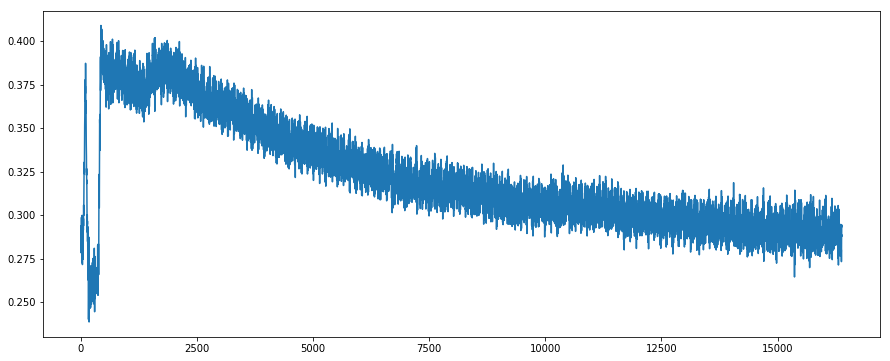

In [55]:
plt.plot(getX(ch1a,19,26))

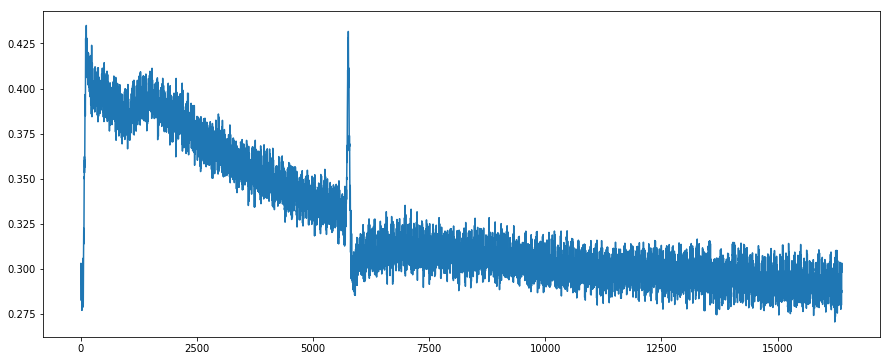

In [56]:
plt.plot(getX(ch1a,19,27))

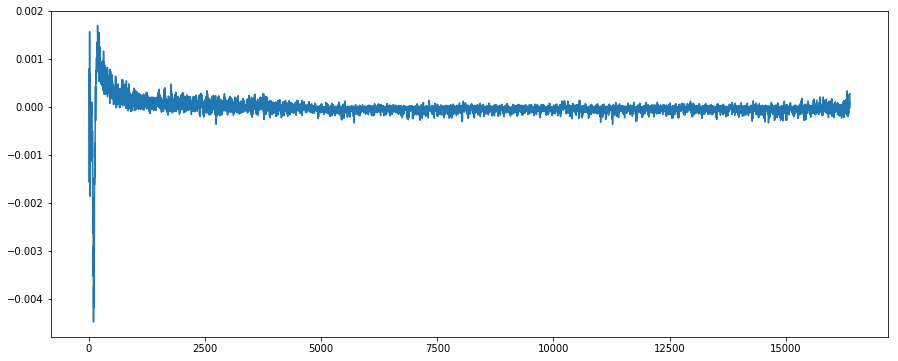

In [90]:
def filterX(x0,NT=-1):
    if NT<0: NT = len(x0)
    x = x0-np.mean(x0[:20])
    NP = 50
    NN = 80
    y = [(x[i]-x[max(i-NP,0)])*(x[min(i+NN,len(x)-1)]-x[max(i-NP,0)]) for i in range(len(x))]
    #plt.plot(x[:500])
    #plt.plot([x[i+NN] for i in range(500)])
    plt.plot([x[min(i+NN,NT-1)]*x[i] for i in range(NT)])
    #plt.plot([x[i]-x[max(i-NP,0)] for i in range(1000)])
    #plt.plot([x[min(i+NN,len(x)-1)]-x[max(i-NP,0)] for i in range(1000)])

    #plt.plot(y[:1000])
filterX(x1)

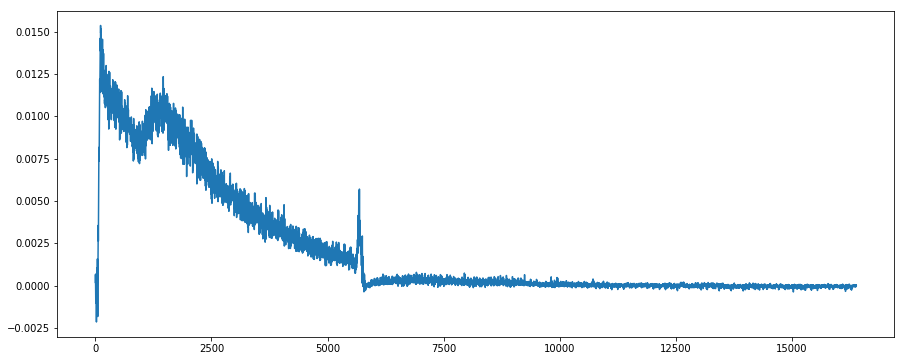

In [91]:
filterX(getX(ch1a,19,27))

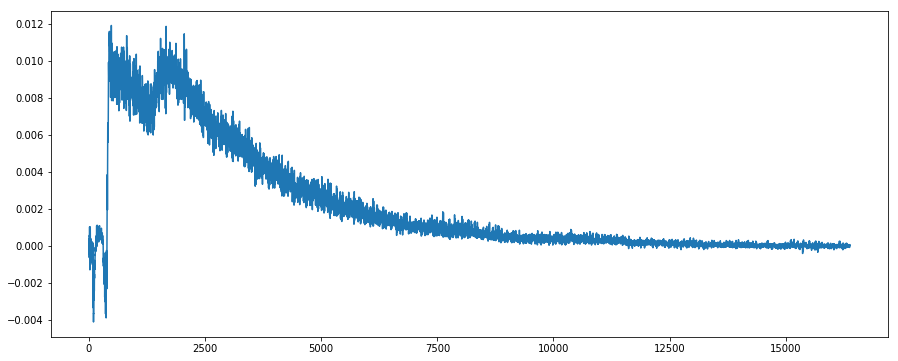

In [92]:
filterX(getX(ch1a,19,26))